In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [99]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [90]:
print(data)
print("Total number of days during which sales are recorded: ",len(data))
print(f"Average sales in 14 days : {np.mean(data)}")

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
Total number of days during which sales are recorded:  14
Average sales in 14 days : 9.214285714285714


In [96]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
	# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
  bootstraps = [np.random.choice(x,sample_size,replace=True) for _ in range(n_bootstraps)]
  # 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
  data_mean = np.mean(bootstraps)
  # 3. Calculate the mean from each bootstrap (i.e., row) and store it.
  mean_of_each_bootstrap = [np.mean(boot) for boot in bootstraps]
  # 4. Calculate the lower and upper bounds for a 95% CI
  sigma = 0.95 # confidence interval
  p = ((1-sigma)/2)*100
  lower = np.percentile(mean_of_each_bootstrap,p)
  p = (sigma+((1-sigma)/2))*100
  upper = np.percentile(mean_of_each_bootstrap,p)
  # 5. Return data_mean, and the lower and upper bounds of your interval
  return data_mean,lower,upper


#bootstrap_mean(data,len(data),100)


(0.0, 50000.0)

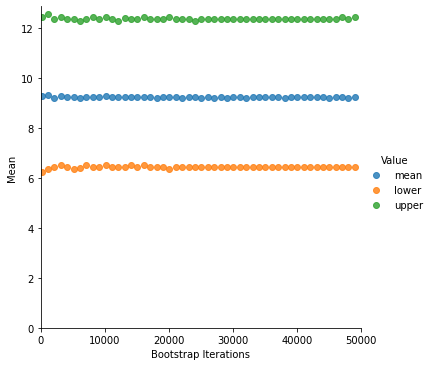

In [54]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [55]:
df_boot.head(6)

,Bootstrap Iterations,Mean,Value
0,100,9.255000,mean
1,100,6.241071,lower
2,100,12.428571,upper
3,1100,9.307403,mean
4,1100,6.357143,lower
5,1100,12.537500,upper



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [123]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):

  bootstraps = [np.random.choice(sample,sample_size,replace=True) for _ in range(n_bootstraps)]
  
  data_mean = np.mean(bootstraps)
  
  mean_of_each_bootstrap = [np.mean(boot) for boot in bootstraps]
 
  sigma = ci/100 # confidence interval
  p = ((1-sigma)/2)*100
  lower = np.percentile(mean_of_each_bootstrap,p)

  p = (sigma+((1-sigma)/2))*100
  upper = np.percentile(mean_of_each_bootstrap,p)

  return data_mean, lower, upper

(0.0, 50000.0)

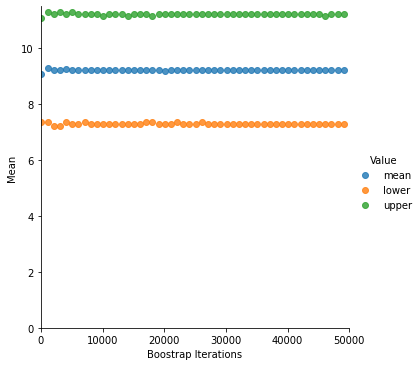

In [60]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [61]:
df_boot.head(6)

,Boostrap Iterations,Mean,Value
0,100,9.085714,mean
1,100,7.357143,lower
2,100,11.078571,upper
3,1100,9.272013,mean
4,1100,7.357143,lower
5,1100,11.285714,upper


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [5]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# <---INSERT YOUR CODE HERE--->

import pandas as pd
vehicles_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
print(vehicles_df.info())
print("--------------------------------------------\n")
print(vehicles_df.head(3))
# Note: you can add more cells as needed to organise your code and your plots


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB
None
--------------------------------------------

   Current fleet  New Fleet
0             18       24.0
1             15       27.0
2             18       27.0


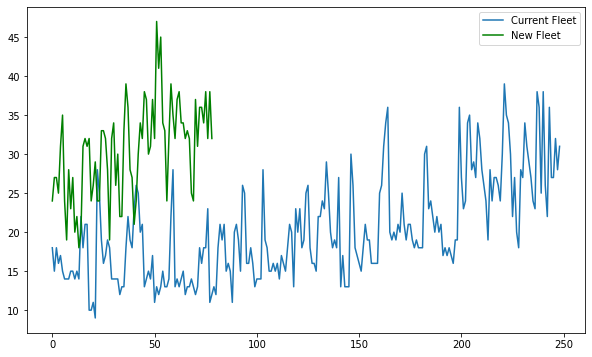

In [21]:
from matplotlib import pyplot as plt
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
plt.figure(figsize=(10,6))
plt.plot(vehicles_df['Current fleet'],label='Current Fleet')
plt.plot(vehicles_df['New Fleet'],label='New Fleet',color='green')
plt.legend()

Text(0.5, 1.0, 'New Fleet')

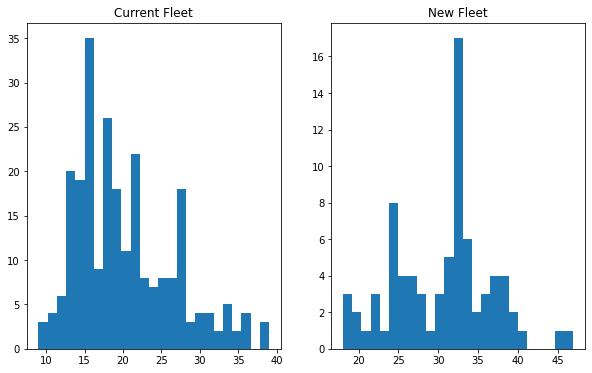

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(vehicles_df['Current fleet'],bins=25)
plt.title('Current Fleet')

plt.subplot(1,2,2)
plt.hist(vehicles_df['New Fleet'],bins=25)
plt.title('New Fleet')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [124]:
# <---INSERT YOUR CODE HERE--->

Currentfleet_mean = vehicles_df['Current fleet'].mean()
Newfleet_mean = vehicles_df['New Fleet'].mean()
print(f"CurrentFleet mean : {Currentfleet_mean} \n NewFleet mean : {Newfleet_mean} \n")

# Construct the 95% CI of the mean of the current fleet.
current_fleet = vehicles_df['Current fleet'].values
mean,lower,upper = bootstrap_mean_ci(current_fleet, len(vehicles_df['Current fleet']), 10000,95)
print(f"The 95% CI of the mean of the current fleet is :  {np.round(lower,3)} - {np.round(upper,3)}")

# Construct the 95% CI of the mean of the new fleet.
new_fleet = vehicles_df['New Fleet'].dropna().values
mean,lower,upper = bootstrap_mean_ci(new_fleet, len(vehicles_df['New Fleet']), 10000,95)
print(f"The 95% CI of the mean of the  new fleet is    :  {np.round(lower,3)} - {np.round(upper,3)}")

CurrentFleet mean : 20.14457831325301 
 NewFleet mean : 30.481012658227847 

The 95% CI of the mean of the current fleet is :  19.365 - 20.952
The 95% CI of the mean of the  new fleet is    :  29.731 - 31.237


<b>Permutation Test : <br></b>
Step1:Define test static<br>
t observed = Newfleet mean - Currentfleet mean (observed value of test statistic)

Step2: Forming Hypothesis <br>
NUll Hypotheis: There is no diffrence between current fleet and new fleet MPG(their means are equal) <br>
Alternate Hypothesis : New fleet MPG is higher than current fleet MPG(new fleet mean higher than current fleet) <br>

Decide the significance level <br>

Step3: <br>
combine the Newfleet and current fleet observations, permutate them. Split again into new and current fleets based on their length. <br>
Calculate the new mean for both new fleet and current fleet samples. <br>
t permutated =  new Newfleet mean - new current fleet mean <br>
Repeat  step3 'n' number of times  <br>

Step4: <br>
Count the number of times t permutated higher than t observed <br>
Divide the count by n. This gives the p-value <br>

Step5: <br>
If the p-value is less than significance level, we can reject Null Hypothesis (Low p-value signifies that value we observed was not just obtained by pure chance)

In [114]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    t_observed = np.mean(sample2) - np.mean(sample1) # sample2 is New fleet, sample1 is old fleet

    concat = np.concatenate((sample1,sample2))

    t_perm = []
    count = 0
    for i in range(n_permutations):
      perm = np.random.permutation(concat)

      new_CurrentFleet = perm[:len(sample1)]
      new_NewFleet = perm[len(sample1):]

      t_permutated = np.mean(new_NewFleet) - np.mean(new_CurrentFleet)
      t_perm.append(t_permutated)
    
      if t_permutated>t_observed:
        count+=1
    pvalue = count/n_permutations
   
    return pvalue,t_perm

In [128]:
# We are choosing a 5% significance level to see if the new fleet is better than current fleet,
# p value less than 0.05 signifies that new fleet is better than current fleet, so we can reject our null hypothesis.
p_value,t_perm = permut_test(current_fleet, new_fleet, 20000)
print(f"The obtained p-value after permutation test is {p_value}, which is lessthan 0.05\n")

"""we found statistically significant differences at a 5% significance level in the average MPG of current and old fleets,with old fleet having higher MPG (p = 0.0)."""

The obtained p-value after permutation test is 0.0, which is lessthan 0.05



'we found statistically significant differences at a 5% significance level in the average MPG of current  and old fleets,with old fleet having higher MPG (p = 0.0).'

[Text(0.5, 1.0, 'Distribution of test-statistic (t_permutated')]

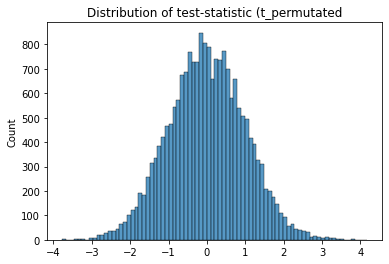

In [116]:
import seaborn as sns
sns.histplot(t_perm).set(title='Distribution of test-statistic (t_permutated')

Text(0, 0.5, 'p-value')

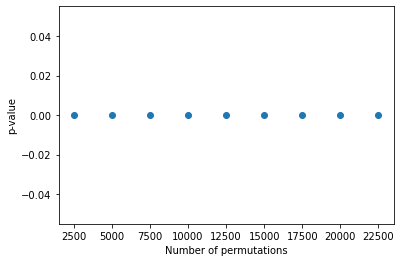

In [117]:
p =[]
for i in range(2500,25000,2500):
  p_value,t_perm = permut_test(current_fleet, new_fleet, i)
  p.append(p_value)

plt.scatter(x=range(2500,25000,2500),y=p)
plt.xlabel('Number of permutations')
plt.ylabel('p-value')

In [119]:
old = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
new = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])
p,t_perm = permut_test(old, new, 20000)
p

0.0321

In [132]:
old = np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])
new = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,0, 1, 1, 1, 1, 1, 1, 1])

p,t_perm = permut_test(old, new, 20000)
p


0.07405

In [104]:
## Slightly modifying the above bootstrap function sothat 
## we can calculate the confidence interval for any gven teststatistic like mean, median, standard deviation and variance.
def bootstrap_mean_general(sample, sample_size, n_bootstraps, ci, test_statistic):
    array_of_samples = np.array([np.random.choice(sample,sample_size,replace=True) for _ in range(n_bootstraps)])
    confidence_interval = ci/100
    p1 = ((1-confidence_interval)/2)*100
    p2 = (confidence_interval+((1-confidence_interval)/2))*100

    if test_statistic == 'mean':
      data_mean = np.mean(array_of_samples)
      mean_of_each_bootstrap = np.array(np.mean(array_of_samples,axis=1))
      lower = np.percentile(mean_of_each_bootstrap,p1)
      upper = np.percentile(mean_of_each_bootstrap,p2)

    elif test_statistic == 'median':
      data_median = np.median(array_of_samples)
      median_of_each_bootstrap = np.array(np.median(array_of_samples,axis=1))
      lower = np.percentile(median_of_each_bootstrap,p1)
      upper = np.percentile(median_of_each_bootstrap,p2)

    elif test_statistic == 'standard deviation':
      data_std_dev = np.std(array_of_samples)
      std_dev_of_each_bootstrap = np.array(np.std(array_of_samples,axis=1))
      lower = np.percentile(std_dev_of_each_bootstrap,p1)
      upper = np.percentile(std_dev_of_each_bootstrap,p2)
      
    elif test_statistic == 'variance':
      data_var = np.var(array_of_samples)
      var_of_each_bootstrap = np.array(np.var(array_of_samples,axis=1))
      lower = np.percentile(var_of_each_bootstrap,p1)
      upper = np.percentile(var_of_each_bootstrap,p2)
    else:
      print("Enter either mean, median, standard deviation or variance to find the confidence intervals")
    return lower,upper

In [106]:
## lab quiz: The 90% confidence interval for the mean of the customers dataset using 10000 iterations is
bootstrap_mean_general(data, len(data), 10000, 90, "mean")

(6.785714285714286, 11.714285714285714)

In [107]:
#The 85% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations is
bootstrap_mean_general(current_fleet, len(current_fleet), 10000, 85, "mean")

(19.55823293172691, 20.73895582329317)

In [108]:
#The 85% confidence interval for the standard deviation of the customers dataset using 10000 iterations is 
bootstrap_mean_general(data, len(data), 10000, 85, "standard deviation")

(3.233277227930364, 6.946221994724902)

In [109]:
#The 95% confidence interval for the standard deviation of the customers dataset using 10000 iterations is
bootstrap_mean_general(data, len(data), 10000, 95, "standard deviation")

(2.711464699443187, 7.340480438038405)

In [120]:
#The p-value from a permutation test with 30000 permutations is, 0.01 (our significance level)
p_value,t_perm = permut_test(current_fleet, new_fleet, 30000)
p_value

0.0

In [111]:
# 0.0<0.01 so we reject null hypothesis

True

In [ ]:
# Type I error: rejecting H0 even though it is true (false positive)
# Type II error: failing to reject H0 even though it is false (false negatives)

In [133]:
"""The data for this question is in voting_data.py.
The file contains data for the 2008 US presidential election results from the “swing states” of PA and OH, specifically,
 the percentage of voters who voted for the Democrats within each county in a given state"""

# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [134]:
print("Number of values in PA : ",len(dem_share_PA))
print("Number of values in OH : ",len(dem_share_OH))

Number of values in PA :  67
Number of values in OH :  88


In [138]:
#The 95% confidence intervals for the means of the votes using 20000 bootstraps are (give two decimal values, e.g., 1.23):
print(bootstrap_mean_general(np.array(dem_share_OH), len(dem_share_OH), 20000, 95, "mean")) #OH
print(bootstrap_mean_general(np.array(dem_share_PA), len(dem_share_PA), 20000, 95, "mean")) #PA

(42.25271590909091, 46.35550568181818)
(43.19566417910448, 47.866425373134334)


In [139]:
# The p-value from a permutation test with 10000 permutations, 0.05 (our significance level)

p_value,t_perm = permut_test(np.array(dem_share_OH), np.array(dem_share_PA),10000)
p_value

0.2325